In [175]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from math import sqrt

In [176]:
class Point:
  def __init__(self):
    self.x = None
    self.y = None
    self.classId = None

  def __init__(self, x: int, y: int, classId=None):
    self.x = x
    self.y = y
    self.classId = classId

  def dist(self, other):
    dx, dy = self.x - other.x, self.y - other.y
    return sqrt(dx * dx + dy * dy)

In [177]:
def classifier(p: Point, points: list, k: int, classCount: int):
  leaders = []
  for i in range(len(points)):
    leaders.append((i, p.dist(points[i])))
  top = sorted(leaders, key=lambda x: x[1])[:k]
  classes = {}
  for top_i in top:
    class_i = points[top_i[0]].classId
    if class_i in classes.keys():
      classes[class_i] += 1
    else:
      classes[class_i] = 1
  max_count = max(classes.values())
  lead_classes = []
  for key, val in classes.items():
    if val == max_count:
      lead_classes.append(key)
  return lead_classes[0] if len(lead_classes) == 1 else classCount

In [178]:
# params

In [179]:
nameX = 'age'
nameY = 'NumberOfOpenCreditLinesAndLoans'
nameZ = 'SeriousDlqin2yrs'
sampleN = 500
sampleIdxBegin = 0
sampleIdxEnd = sampleIdxBegin + sampleN - 1
k = 1

In [180]:
data = pd.read_csv('data.csv')
featureX = data.loc[sampleIdxBegin:sampleIdxEnd, nameX]
featureY = data.loc[sampleIdxBegin:sampleIdxEnd, nameY]
classZ = data.loc[sampleIdxBegin:sampleIdxEnd, nameZ]
classCount = classZ.nunique()

In [181]:
xmin, xmax, ymin, ymax = featureX.min(), featureX.max(), featureY.min(), featureY.max()
sizeX, sizeY = xmax + 1, ymax + 1

# classTable contains classId
classTable = np.empty((sizeY, sizeX))
classTable.fill(-1)

In [182]:
# fill classTable with initial values and collect all known points in one list
points = []
for i in range(sampleN):
  xi, yi, zi = featureX[i], featureY[i], classZ[i]
  if classTable[yi, xi] == -1:
    classTable[yi, xi] = zi
    points.append(Point(xi, yi, zi))
  else:
    classZ[i] = classTable[yi, xi]

In [183]:
for y in range(classTable.shape[0]):
  for x in range(classTable.shape[1]):
    if classTable[y, x] != -1:
      continue
    classTable[y, x] = classifier(Point(x, y), points, k, classCount)

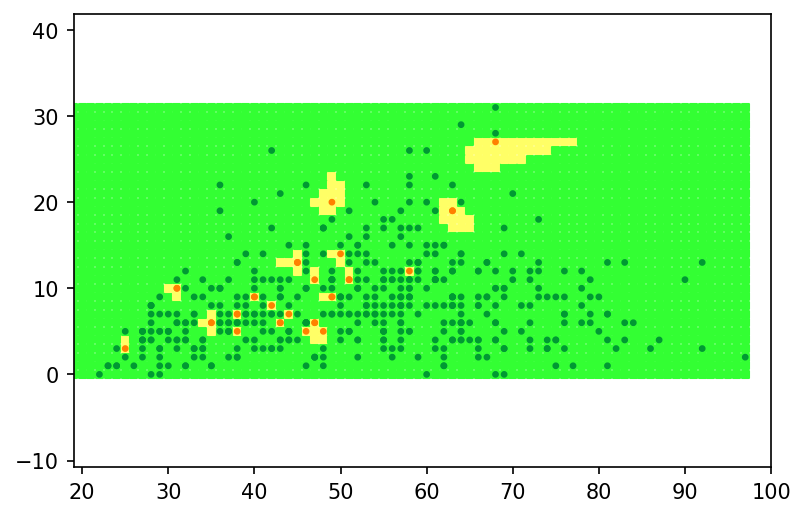

In [184]:
x, y = np.arange(0, sizeX), np.arange(0, sizeY)
X, Y = np.meshgrid(x, y)

colors = list(classTable.flatten())
green = np.array([51, 255, 51])
dark_green = np.array([0, 153, 51])
blue = np.array([0, 0, 128])
grey = np.array([128, 128, 128])
yellow = np.array([255, 255, 102])
for i in range(len(colors)):
  if colors[i] == 0:
    colors[i] = green / 255.0
  elif colors[i] == 1:
    colors[i] = yellow / 255.0
  else:
    colors[i] = grey / 255.0

plt.axis('equal')
plt.scatter(X, Y, c=colors, s=11, marker='s')

orange = np.array([255, 128, 0])

orig_colors = [list()] * len(featureX)
for i in range(len(orig_colors)):
  orig_colors[i] = orange / 255.0 if classZ[i] == 1 else dark_green / 255.0

plt.scatter(featureX, featureY, c=orig_colors, s=5, marker='o')

delta = 3
plt.axis([xmin-delta, xmax+delta, ymin-delta, ymax+delta])
plt.rcParams['figure.dpi'] = 150
plt.show()